In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Frederick\anaconda3\envs\test_proyec\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_DA_us = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_us = df_DA_us.dropna(subset=["salary_year_avg"])

df_DA_us["salary_year_avg"].sample(10)

12498     127500.000000
376244     95000.000000
715175    115000.000000
531848     80000.000000
201957    160000.000000
218080     65000.000000
393362    110240.109375
182831     90000.000000
655698    102400.000000
217498     96500.000000
Name: salary_year_avg, dtype: float64

<Axes: >

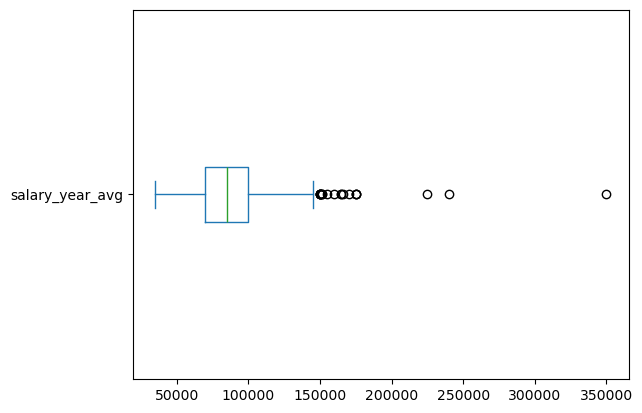

In [9]:
df_DA_us["salary_year_avg"].plot(kind="box", vert=False)

In [17]:
job_titles = ["Data Analyst", "Data Engineer", "Data Scientist"]

df_us = df[(df["job_title_short"].isin(job_titles)) & (df["job_country"] == "United States")].copy()

df_us = df_us.dropna(subset=["salary_year_avg"])

job_list = [df_us[df_us["job_title_short"] == job_title]["salary_year_avg"] for job_title in job_titles]

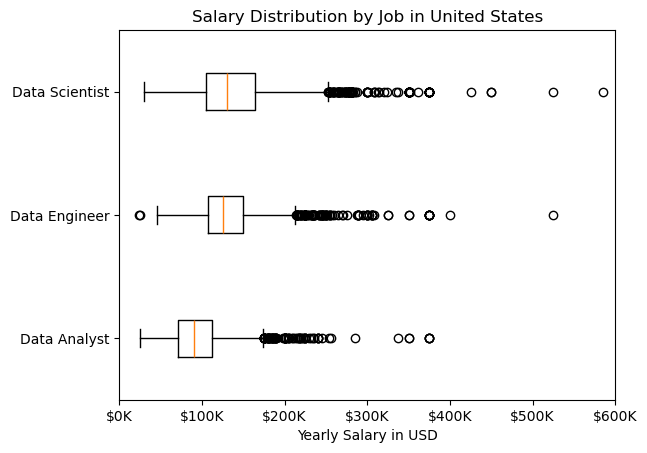

In [24]:
plt.boxplot(job_list, vert=False, labels=job_titles)

plt.title("Salary Distribution by Job in United States")
plt.xlabel("Yearly Salary in USD")
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))
plt.xlim(0, 600_000)
plt.show()